In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

x = iris.data[:, [2,3]]
y = iris.target

In [3]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.3 , random_state= 1 , stratify = y)

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [5]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0 = 0.01 , random_state=1)
ppn.fit(x_train_std , y_train)

Perceptron(eta0=0.01, random_state=1)

In [6]:
y_pred = ppn.predict(x_test_std)
print('Miscalssifief examples: %d ' % (y_test != y_pred).sum())

Miscalssifief examples: 2 


In [7]:
from sklearn.metrics import accuracy_score
print('Accuracy : %.3f' %accuracy_score(y_test, y_pred))

Accuracy : 0.956


In [8]:
print('Accuracy : %.3f' % ppn.score(x_test_std, y_test))

Accuracy : 0.956


In [9]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(x, y, classifier , test_idx=None , resolution= 0.02 ):
    markers = ('o' , 's', '^' , 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min , x1_max = x[: , 0].min() - 1 , x[:, 0].max() + 1
    x2_min , x2_max = x[: , 1].min() - 1 , x[:, 1].max() + 1
    xx1 , xx2 = np.meshgrid(np.arange(x1_min , x1_max , resolution),
                            np.arange(x2_min , x2_max , resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1 , xx2, lab , alpha = 0.3 , cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx , cl in enumerate(np.unique(y)):
        plt.scatter(x = x[y == cl, 0],
                    y = x[y == cl, 1],
                    alpha = 0.8 ,
                    c =  colors[idx],
                    marker = markers[idx],
                    label = f'class {cl}',
                    edgecolor= 'black')
        
    if test_idx :
        x_test, y_test = x[test_idx , :] , y[test_idx]
        plt.scatter(x_test[:, 0] , x_test[: , 1] , c = 'none', edgecolor= 'black' , alpha = 1.0 , linewidth= 1 , marker= 'o' , s = 100 , label = 'Test Set')    

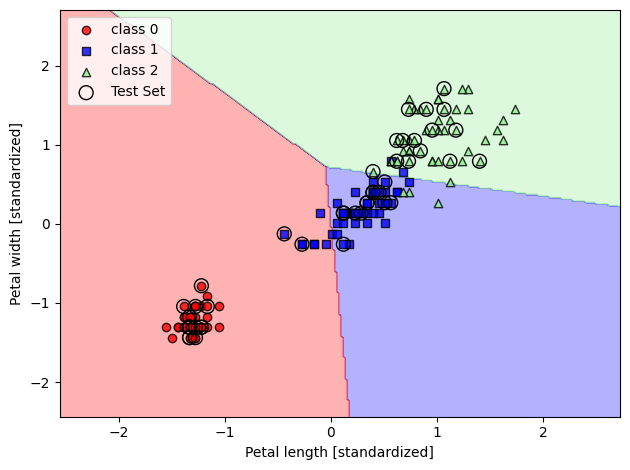

In [10]:
x_combined_std = np.vstack((x_train_std , x_test_std))
y_combined = np.hstack((y_train , y_test))

plot_decision_regions(x= x_combined_std , y = y_combined , classifier= ppn , test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()